<a href="https://colab.research.google.com/github/Ale1726/Machine-Learning-aplicado-al-Credit-Scoring/blob/main/Arbol_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÁRBOL DE DECISIÓN

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score
#from string import ascil_uppercase
import pandas as pd
import seaborn as sns

In [38]:
clientes = pd.read_csv('/content/drive/MyDrive/proyecto 1/clientes.csv',index_col=[0])

In [39]:
clientes.sample(10) # Se toma una muestra aleatoria para verificar la correcta composición de la base de datos 

,ID,GENERO,TIENE_AUTO,TIENE_PROPIEDAD,HIJOS,INGRESOS_ANUALES,CATEGORIA_DE_INGRESOS,NIVEL_EDUCATIVO,ESTADO_CIVIL,ESTADO_DE_PROPIEDAD,EDAD,TIEMPO_EMPLEO,TEL_CEL,TEL_TRABAJO,TEL_FIJO,CORREO,OCUPACION,DEPENDIENTES ECONOMICOS,STATUS,MOROSO
18537,5069283,1,0,1,1,315000.0,1,1,1,1,45.0,12.0,1,0,1,0,2.0,3.0,1,0
29965,5118561,1,1,1,0,180000.0,1,2,1,6,30.0,3.0,1,0,0,0,3.0,2.0,0,0
23760,5096168,1,0,0,0,112500.0,2,1,1,1,54.0,2.0,1,0,0,0,6.0,2.0,0,0
11577,5048192,0,1,1,0,247500.0,4,2,2,1,27.0,2.0,1,1,1,0,6.0,1.0,1,0
27594,5114335,1,0,0,1,135000.0,1,1,3,1,28.0,3.0,1,0,0,0,1.0,3.0,0,0
17784,5068304,0,0,1,0,135000.0,1,1,2,1,37.0,1.0,1,0,0,0,NaN,1.0,0,0
26780,5113204,0,0,0,1,396000.0,1,3,1,1,30.0,5.0,1,0,0,0,NaN,3.0,0,0
26292,5116990,0,1,1,0,135000.0,1,1,1,1,40.0,10.0,1,0,1,0,1.0,2.0,0,0
14023,5054639,1,0,1,2,180000.0,1,1,1,1,37.0,1.0,1,0,1,0,3.0,4.0,0,0
27483,5114172,0,1,0,1,171000.0,1,2,1,2,42.0,4.0,1,0,0,0,NaN,3.0,0,0


Se crea las datas de las variables dependientes y despendientes

In [40]:
columnas= list(clientes.columns.values)
no_deseados=['MOROSO','ESTADO_CIVIL','TEL_CEL','TEL_TRABAJO','TEL_FIJO',
             'CORREO','STATUS','ID']
for no_deseado in no_deseados:
    columnas.remove(no_deseado)


clientes_entrena = clientes[['EDAD','INGRESOS_ANUALES','NIVEL_EDUCATIVO','ESTADO_CIVIL','DEPENDIENTES ECONOMICOS']]

clientes_prueba = clientes['MOROSO']

 Se crea datos el train_test_split con una división del 70-30

In [41]:
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    clientes_entrena,clientes_prueba,test_size=0.30,random_state = 42)

Se crea el arbol de decisión

In [42]:
arbol_decision= tree.DecisionTreeClassifier(
    criterion='entropy', #Criterio
    max_depth=5) #Mxima profundidad

arbol = arbol_decision.fit(datos_entrena,clase_entrena)

leyendas=list(datos_entrena.columns.values)
print(tree.export_text(arbol,feature_names=leyendas)) 

|--- EDAD <= 47.50
|   |--- EDAD <= 24.50
|   |   |--- class: 0
|   |--- EDAD >  24.50
|   |   |--- NIVEL_EDUCATIVO <= 3.50
|   |   |   |--- EDAD <= 29.50
|   |   |   |   |--- INGRESOS_ANUALES <= 387000.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- INGRESOS_ANUALES >  387000.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- EDAD >  29.50
|   |   |   |   |--- INGRESOS_ANUALES <= 274500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- INGRESOS_ANUALES >  274500.00
|   |   |   |   |   |--- class: 0
|   |   |--- NIVEL_EDUCATIVO >  3.50
|   |   |   |--- EDAD <= 44.50
|   |   |   |   |--- DEPENDIENTES ECONOMICOS <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DEPENDIENTES ECONOMICOS >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- EDAD >  44.50
|   |   |   |   |--- INGRESOS_ANUALES <= 184500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- INGRESOS_ANUALES >  184500.00
|   |   |   |   |   |--- class: 0
|--- EDAD >  47.50
|   |--- ING

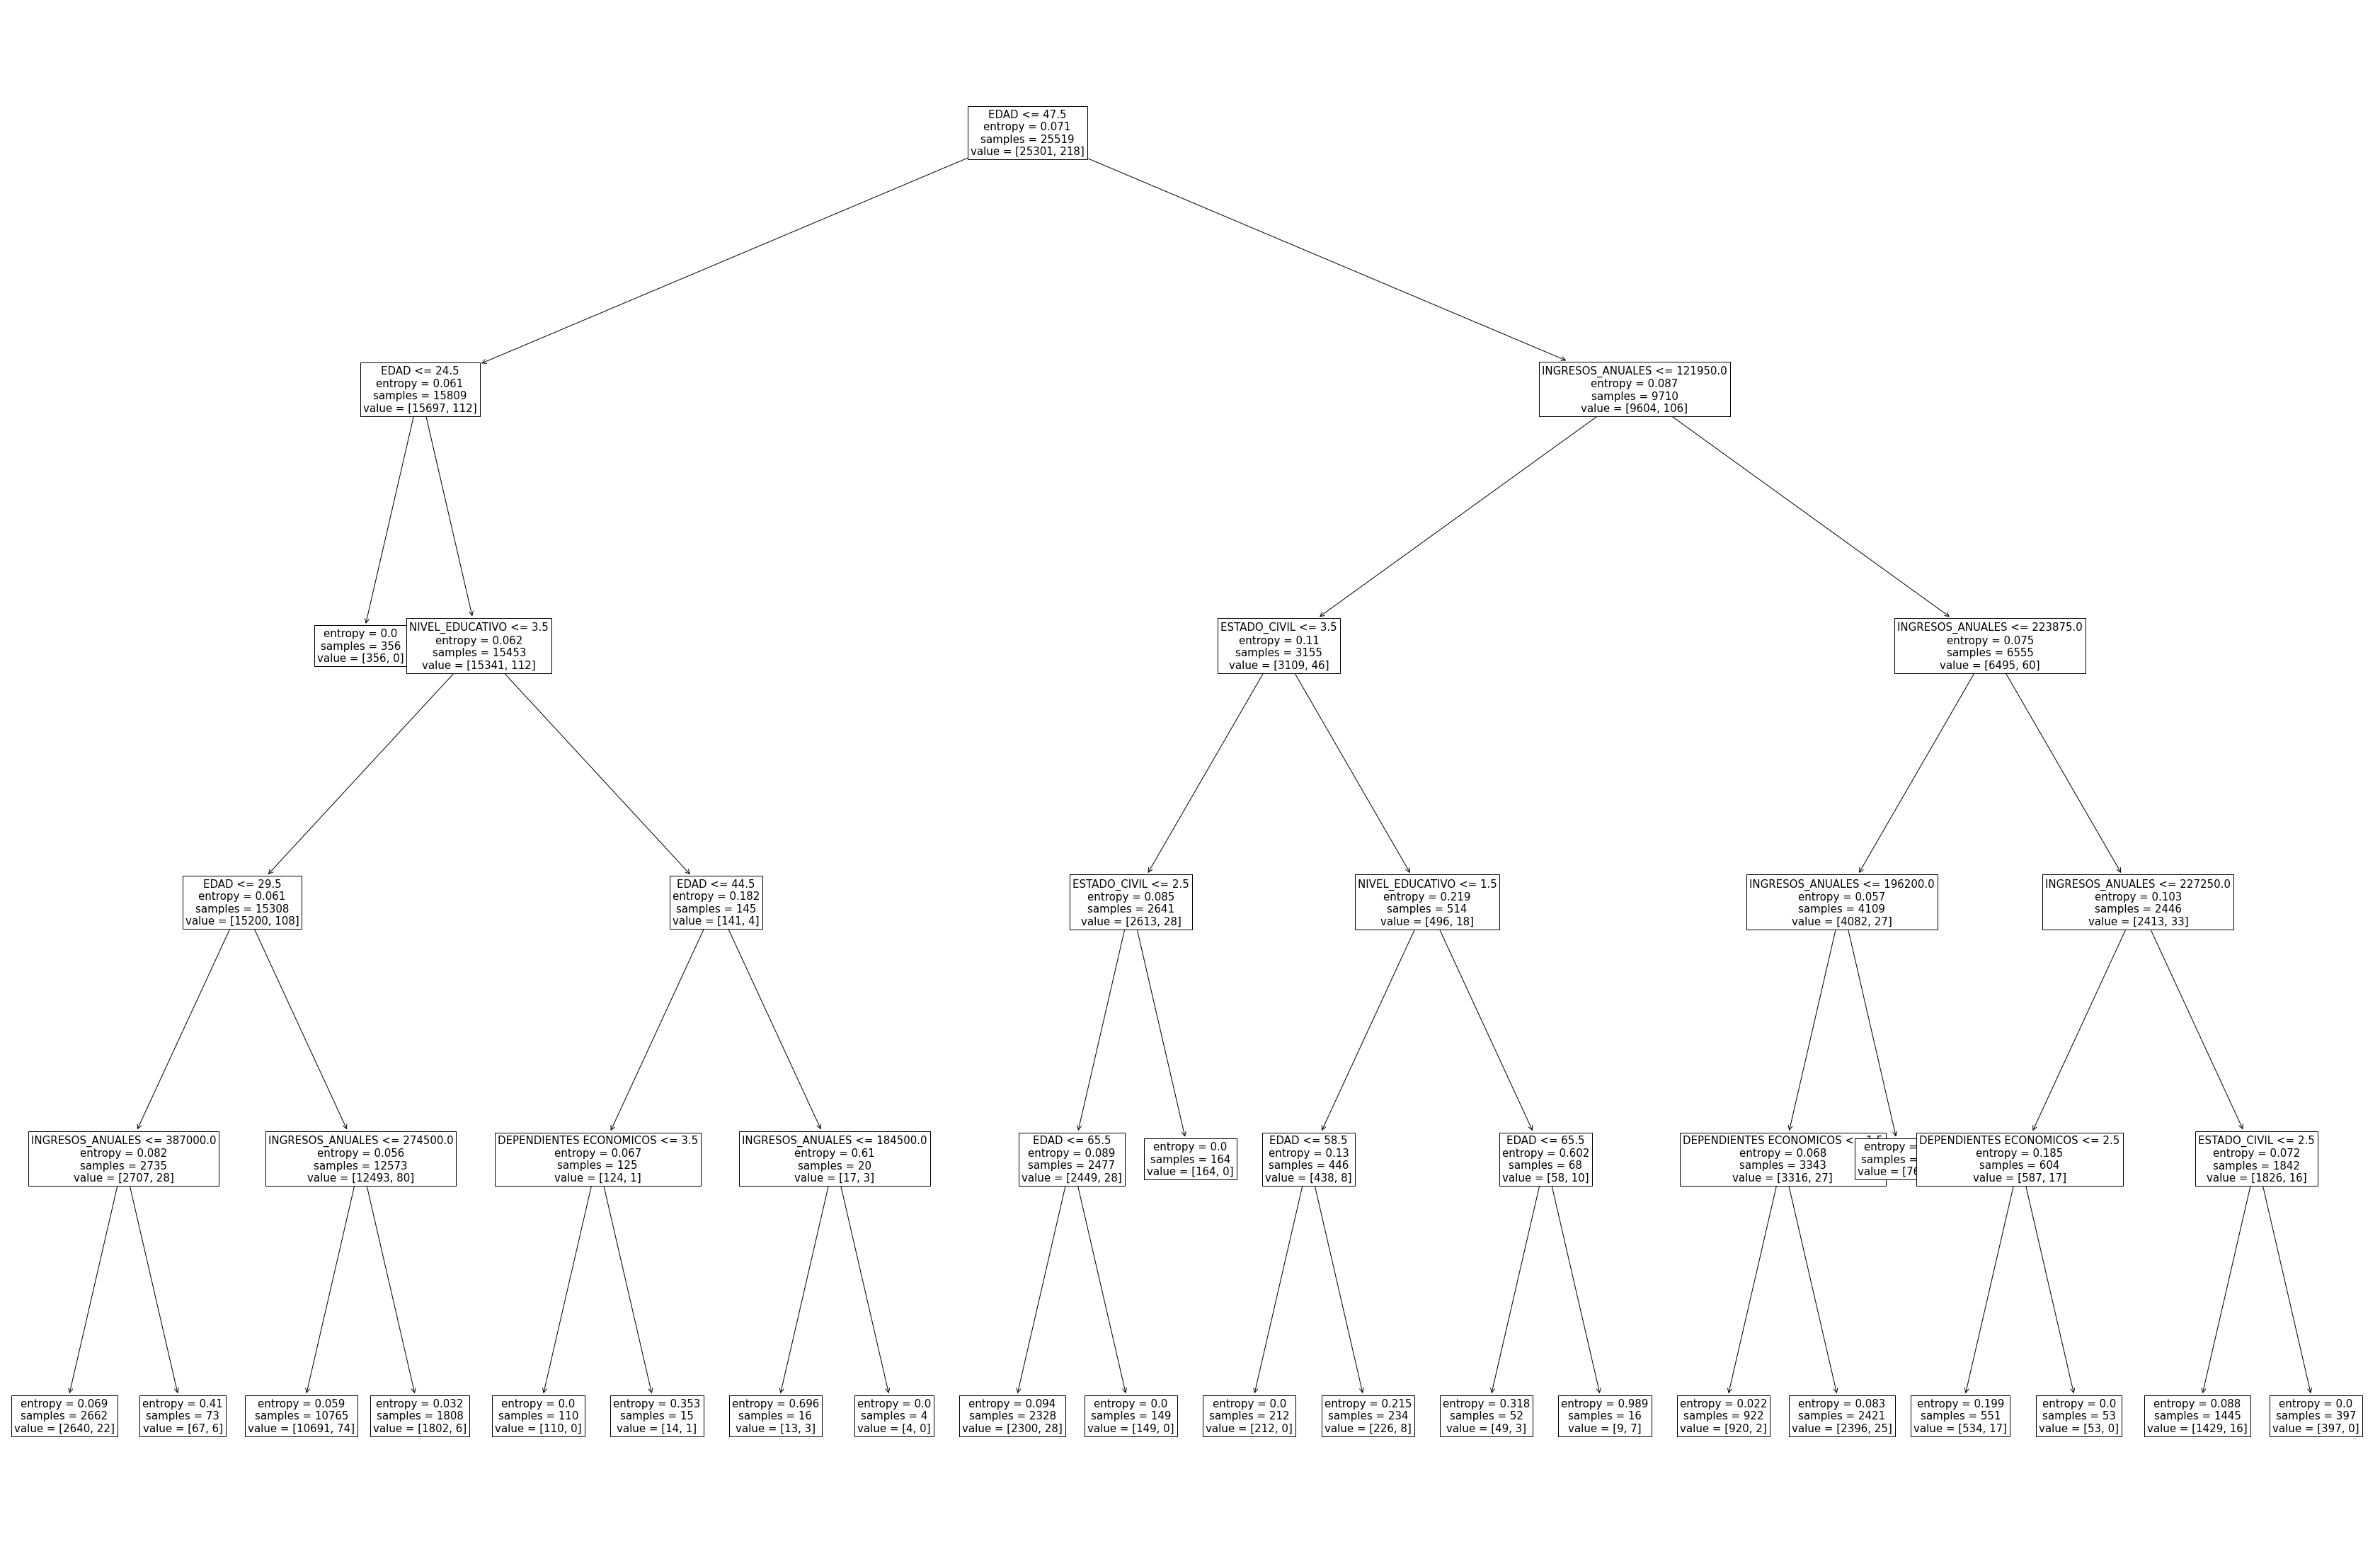

In [43]:
plt.figure(figsize=(60,40))

tree.plot_tree(arbol,feature_names=leyendas,fontsize=15)

plt.show()

#SAMPLES CANTIDAD DE DATOS OCUPADOS
#Value: separacion

# Evaluación del modelo

In [50]:
y_predict = arbol.predict(datos_prueba)
acuaracy=arbol_decision.score(datos_prueba,clase_prueba)
exactitud=accuracy_score(clase_prueba,y_predict)
sensibilidad=recall_score(clase_prueba,y_predict)
print(acuaracy)
print(exactitud)
print(sensibilidad)

0.9923203510696654
0.9923203510696654
0.0


In [45]:
reporte=classification_report(clase_prueba, y_predict)
print(reporte)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10854
           1       0.00      0.00      0.00        84

    accuracy                           0.99     10938
   macro avg       0.50      0.50      0.50     10938
weighted avg       0.98      0.99      0.99     10938



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
